In [2]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

In [3]:
session = fastf1.get_session(2024, "Spain", 'R')
session.load()
laps = session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (99.08 MB) C:\Users\righi\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', 

In [4]:
drivers = session.drivers
print(drivers)

['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']


In [5]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'NOR', 'HAM', 'RUS', 'LEC', 'SAI', 'PIA', 'PER', 'GAS', 'OCO', 'HUL', 'ALO', 'ZHO', 'STR', 'RIC', 'BOT', 'MAG', 'ALB', 'TSU', 'SAR']


In [6]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [7]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM           18
1     ALB    2.0     SOFT           25
2     ALB    3.0     SOFT           22
3     ALO    1.0     SOFT           19
4     ALO    2.0   MEDIUM           26
..    ...    ...      ...          ...
57    VER    2.0   MEDIUM           27
58    VER    3.0     SOFT           22
59    ZHO    1.0     SOFT            9
60    ZHO    2.0   MEDIUM           32
61    ZHO    3.0     HARD           24

[62 rows x 4 columns]


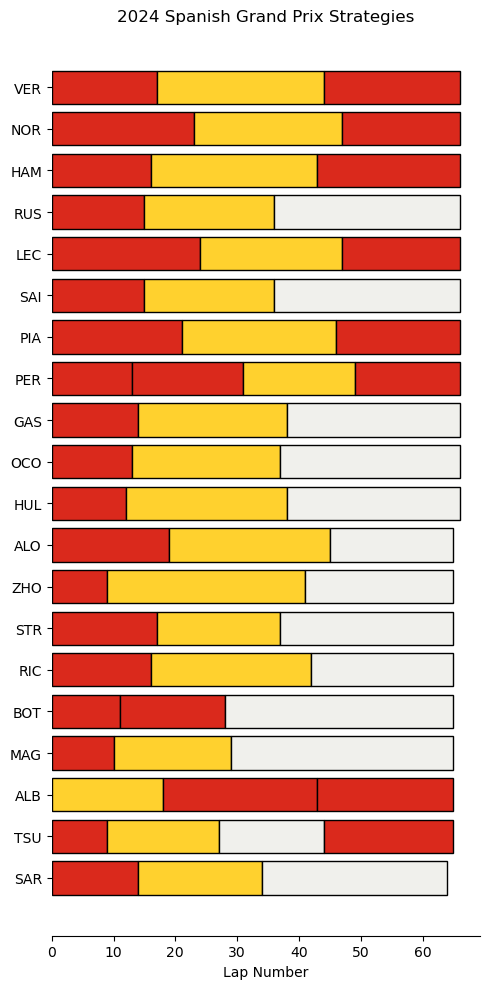

In [11]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2024 Spanish Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()